# DAG Visualization

In this notebook we explore different visualization techniques for DAGS. 

In [1]:
import sys
sys.path.append("..")
from d2c.simulatedDAGs import SimulatedDAGs

# Initialize the SimulatedDAGs object
sim_dags = SimulatedDAGs(n_dags=1, n_observations=100, n_nodes=5)

# Generate the DAGs
sim_dags.generate_dags()
DAG = sim_dags.get_dags()[0]


## CausalNex 
It uses `pyvis` which is built around `VisJS`

In [2]:
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import display, IFrame, HTML


# Convert NetworkX DiGraph to causalnex StructureModel
sm = StructureModel()
sm.add_edges_from(DAG.edges())

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

html = viz.generate_html()
with open("example.html", mode='w', encoding='utf-8') as fp:
                fp.write(html)

IFrame("example.html", width=viz.width, height=viz.height)

c:\ProgramData\Anaconda3\envs\d2c\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Digraph from graphviz

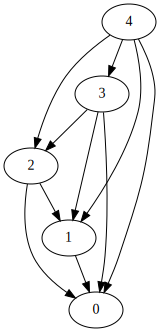

In [3]:
from graphviz import Digraph

G_dot = Digraph(engine="dot",format='png')

for node in DAG.nodes():
    G_dot.node(str(node))
for edge in DAG.edges():
    G_dot.edge(str(edge[0]), str(edge[1]))

# Render the graph in a hierarchical layout
G_dot

## PyGraphviz

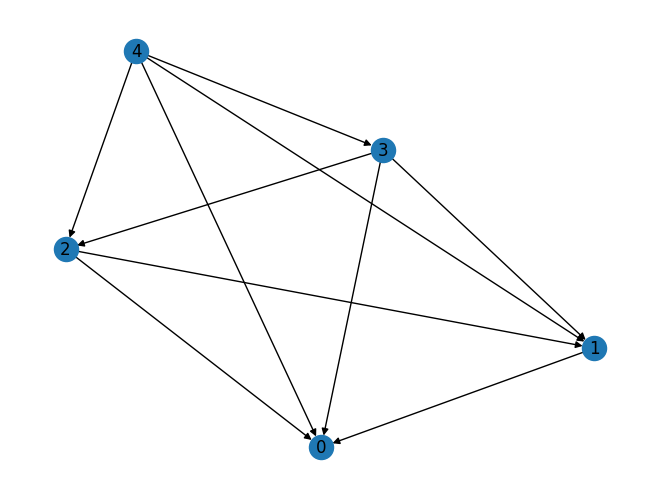

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


# Use PyGraphviz to create a hierarchical layout
pos = nx.drawing.nx_agraph.graphviz_layout(DAG, prog='dot')

nx.draw(DAG, pos, with_labels=True, arrows=True)
plt.show()

Seems like Digraph from graphviz provides a better hierarchical visualization of the graph.